# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">Playground series S3-E9</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p> 
**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
 This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>
​
​
**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.
​
A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Useful information</p>
**🟦EN**: 
There Various Factors that affects the Strength of Concrete Such as Materials Used, Age etc.
Predict the Strength of the Concrete Based on the Components and Other Factors as Predictors.

**🟥ES**:
Hay varios factores que afectan a la resistencia del hormigón, como los materiales utilizados, la edad, etc.
Predecir la resistencia del hormigón basándose en los componentes y otros factores como predictores.

### <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#2C3FD6; font-size:130%; text-align:left;padding: 0px;"><strong>Data information</strong>
**🟦EN**:
* ```CementComponent``` - Amount of cement is mixed
* ```BlastFurnaceSlag``` - Amount of Blast Furnace Slag is mixed
* ```FlyAshComponent``` - Amount of FlyAsh is mixed
* ```WaterComponent``` - Amount of water is mixed
* ```SuperplasticizerComponent``` - Amount of Super plasticizer is mixed
* ```CoarseAggregateComponent``` - Amount of Coarse Aggregate is mixed
* ```FineAggregateComponent``` - Amount of Coarse Aggregate is mixed
* ```AgeInDays``` - How many days it was left dry
* ```Strength``` - What was the final strength of concrete- (Target)
    
**🟥ES**:
* ```CementComponent``` - Cantidad de cemento mezclado
* ```BlastFurnaceSlag``` - Cantidad de escoria de alto horno mezclada
* ```FlyAshComponent``` - Cantidad de ceniza volante mezclada
* ```WaterComponent``` - Cantidad de agua mezclada
* ```SuperplasticizerComponent``` - Se mezcla la cantidad de superplastificante.
* ```CoarseAggregateComponent``` - Cantidad de árido grueso mezclado.
* ```FineAggregateComponent``` - Cantidad de árido grueso mezclado.
* ```AgeInDays``` - Cuántos días se ha dejado secar.
* ```Strength``` - Cuál fue la resistencia final del hormigón- (Objetivo)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Libraries</p>

In [1]:
import os 
import sys
import math
import time
import torch
import random
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import optuna.integration.lightgbm as lgbo

from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL

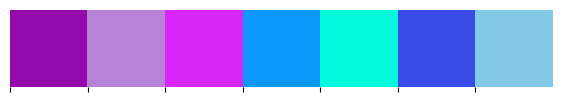

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = ["#cfe6ff", "#a085f2"]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]

sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e9"
TRAIN_FILENAME = "train.csv"
TEST_FILENAME = "test.csv"
SUBMISSION_FILENAME = "sample_submission.csv"

# Data dir
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)
ORIGINAL_DIR = "/kaggle/input/predict-concrete-strength/ConcreteStrengthData.csv"


In [5]:
ID = "id"
CEMENT_COMPONENT = "CementComponent"
BLAST_FURNACE_SLAG = "BlastFurnaceSlag"
FLY_ASH_COMPONENT = "FlyAshComponent"
WATER_COMPONENT = "WaterComponent"
SUPERPLASTICIZER_COMPONENT = "SuperplasticizerComponent"
COARSE_AGGREGATE_COMPONENT = "CoarseAggregateComponent"
FINE_AGGREGATE_COMPONENT = "FineAggregateComponent"
AGE_IN_DAYS = "AgeInDays"

TARGET = "Strength"

In [6]:
CATEGORICAL_COLS = [AGE_IN_DAYS]
NUM_COLS = [CEMENT_COMPONENT, BLAST_FURNACE_SLAG,
            FLY_ASH_COMPONENT, WATER_COMPONENT, 
            SUPERPLASTICIZER_COMPONENT, COARSE_AGGREGATE_COMPONENT,
            FINE_AGGREGATE_COMPONENT]
ORDINAL_COLS = []

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [7]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    plt.show()

In [8]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [9]:
def plot_cont_dot(
    df, column, target, ax,
    show_yticks=False, color=PALETTE_7[0]
):

    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df[target]
    target = target.groupby(bins).mean()
    target.plot(
        ax=ax, linestyle="",
        marker=".", color=color,
        label=f"Mean {target.name}"
    )
    ax.grid(visible=False)
    
    if not show_yticks:
        ax.get_yaxis().set_ticks([])
        
    return ax

In [10]:
def plot_ordinals(col, ax, color):
    percentage = comb_df.groupby("set")[col].value_counts(True)
    percentage = percentage.rename("%").reset_index()
    sns.barplot(data=percentage, x=col, y="%",
                hue="set",ax=ax, hue_order=labels, palette=PALETTE_7) #PALETTE[0:4]
    
    if percentage.shape[0] > 100:
        ticks = ax.get_xticks()
        text = ax.get_xticklabels()
        
        step = len(ticks)//8
        ax.set_xticks(ticks[::step], text[::step])
        
    plot_ordinal_dots(col, ax)

In [11]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,DARK_BLUE],
            title="Target distribution"):
    df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

In [12]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [13]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
original_df = pd.read_csv(ORIGINAL_DIR)
submission_df = pd.read_csv(SUBMISSION_DIR)

In [14]:
original_df = original_df.rename(columns = {CEMENT_COMPONENT + " ": CEMENT_COMPONENT})

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [15]:
data_description(train_df)
data_description(test_df)
data_description(original_df)
data_description(submission_df)

Data description
Total number of records 5407
number of features 10


                        Name     Type  Unique levels  Missing
0                         id    int64           5407        0
1            CementComponent  float64            314        0
2           BlastFurnaceSlag  float64            224        0
3            FlyAshComponent  float64            177        0
4             WaterComponent  float64            215        0
5  SuperplasticizerComponent  float64            112        0
6   CoarseAggregateComponent  float64            342        0
7     FineAggregateComponent  float64            376        0
8                  AgeInDays    int64             15        0
9                   Strength  float64            843        0
Data description
Total number of records 3605
number of features 9


                        Name     Type  Unique levels  Missing
0                         id    int64           3605        0
1            CementComponent  float64            290   

In [16]:
train_df.columns.values

array(['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'], dtype=object)

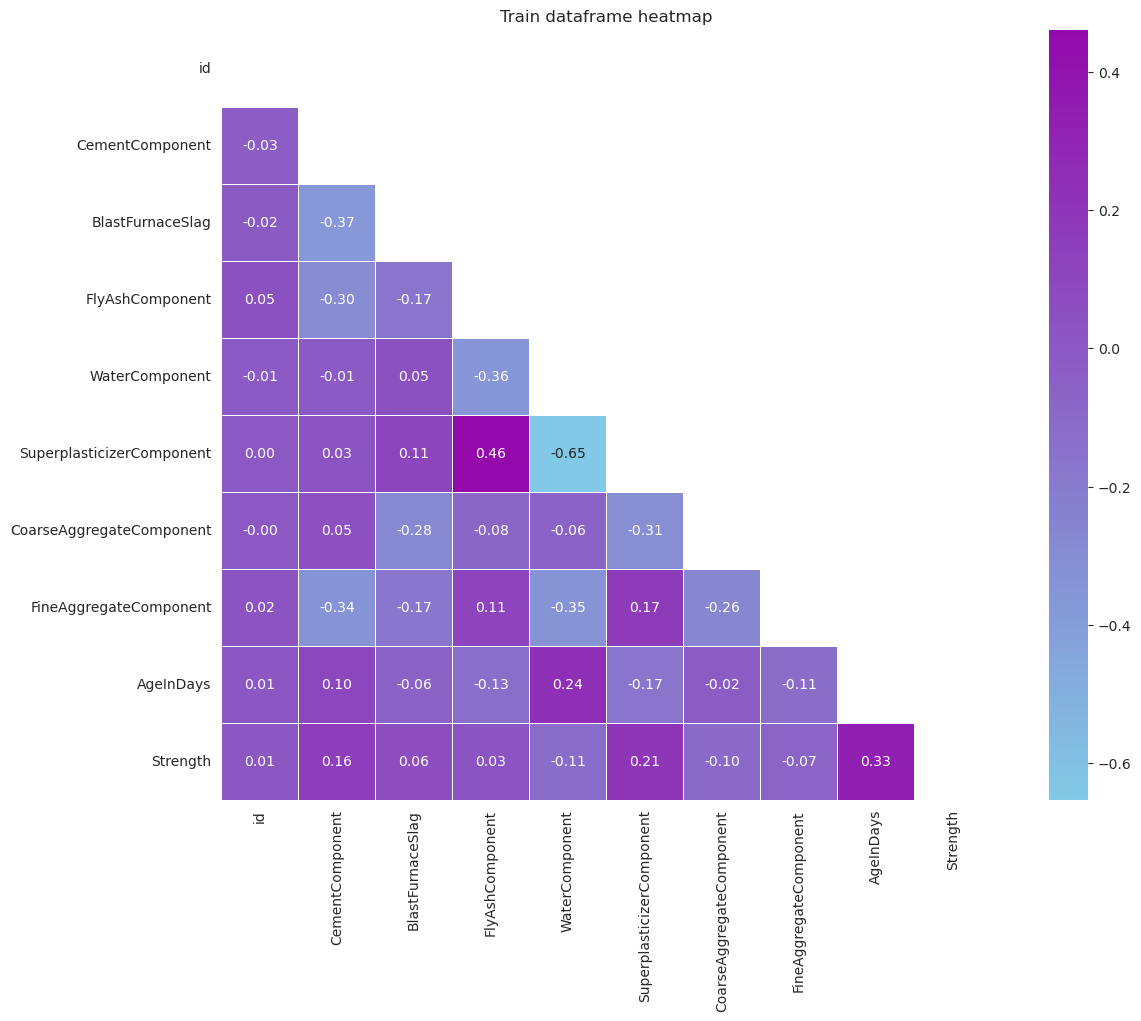

None

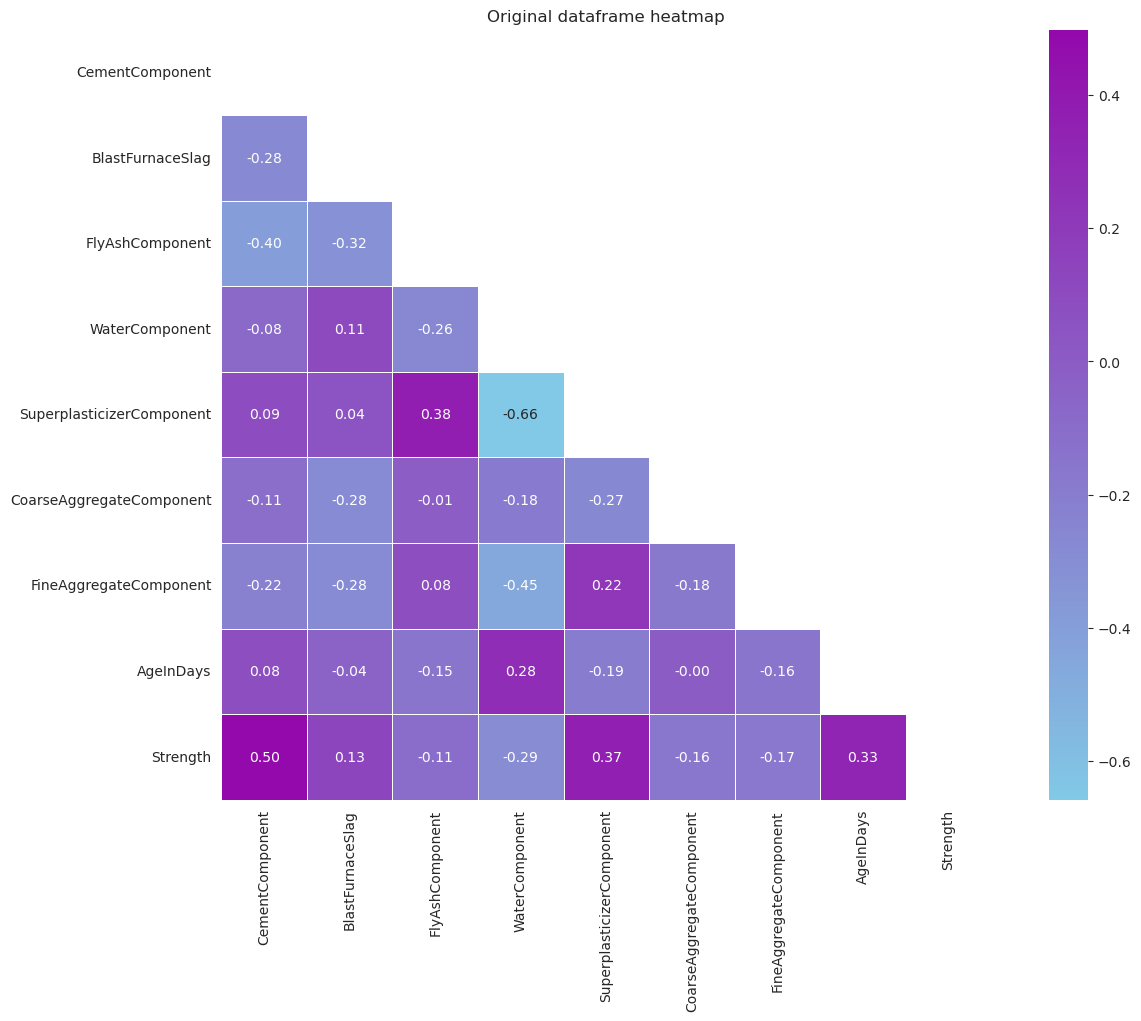

None

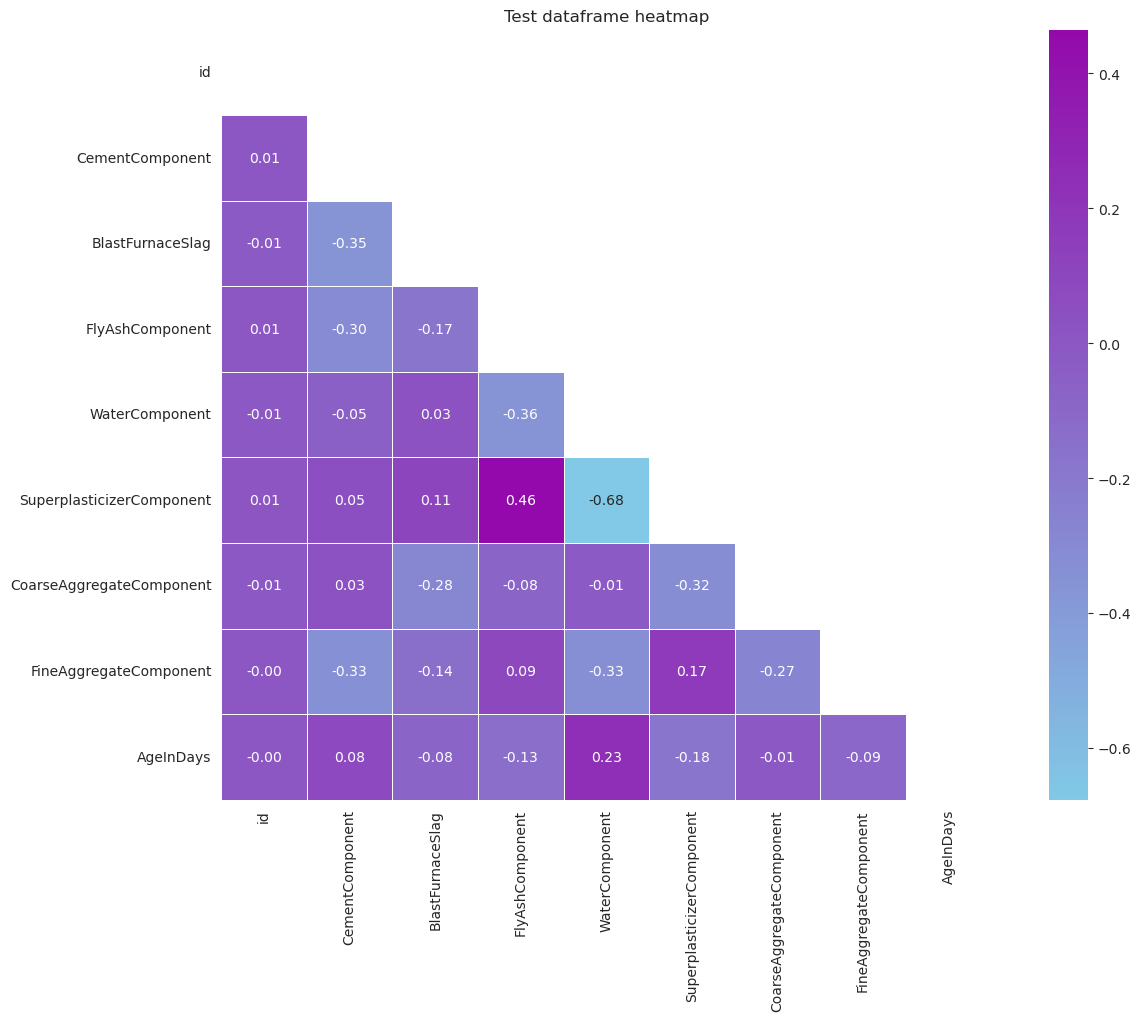

None

In [17]:
display(show_corr_heatmap(train_df, "Train dataframe heatmap"))
display(show_corr_heatmap(original_df, "Original dataframe heatmap"))
display(show_corr_heatmap(test_df, "Test dataframe heatmap"))

In [18]:
labels = ["train", "test", "original"]
comb_df = comb_df = pd.concat([
    train_df.assign(set=labels[0]),
    test_df.assign(set=labels[1]),
    original_df.assign(set=labels[2]),
])
comb_df.reset_index(inplace=True)

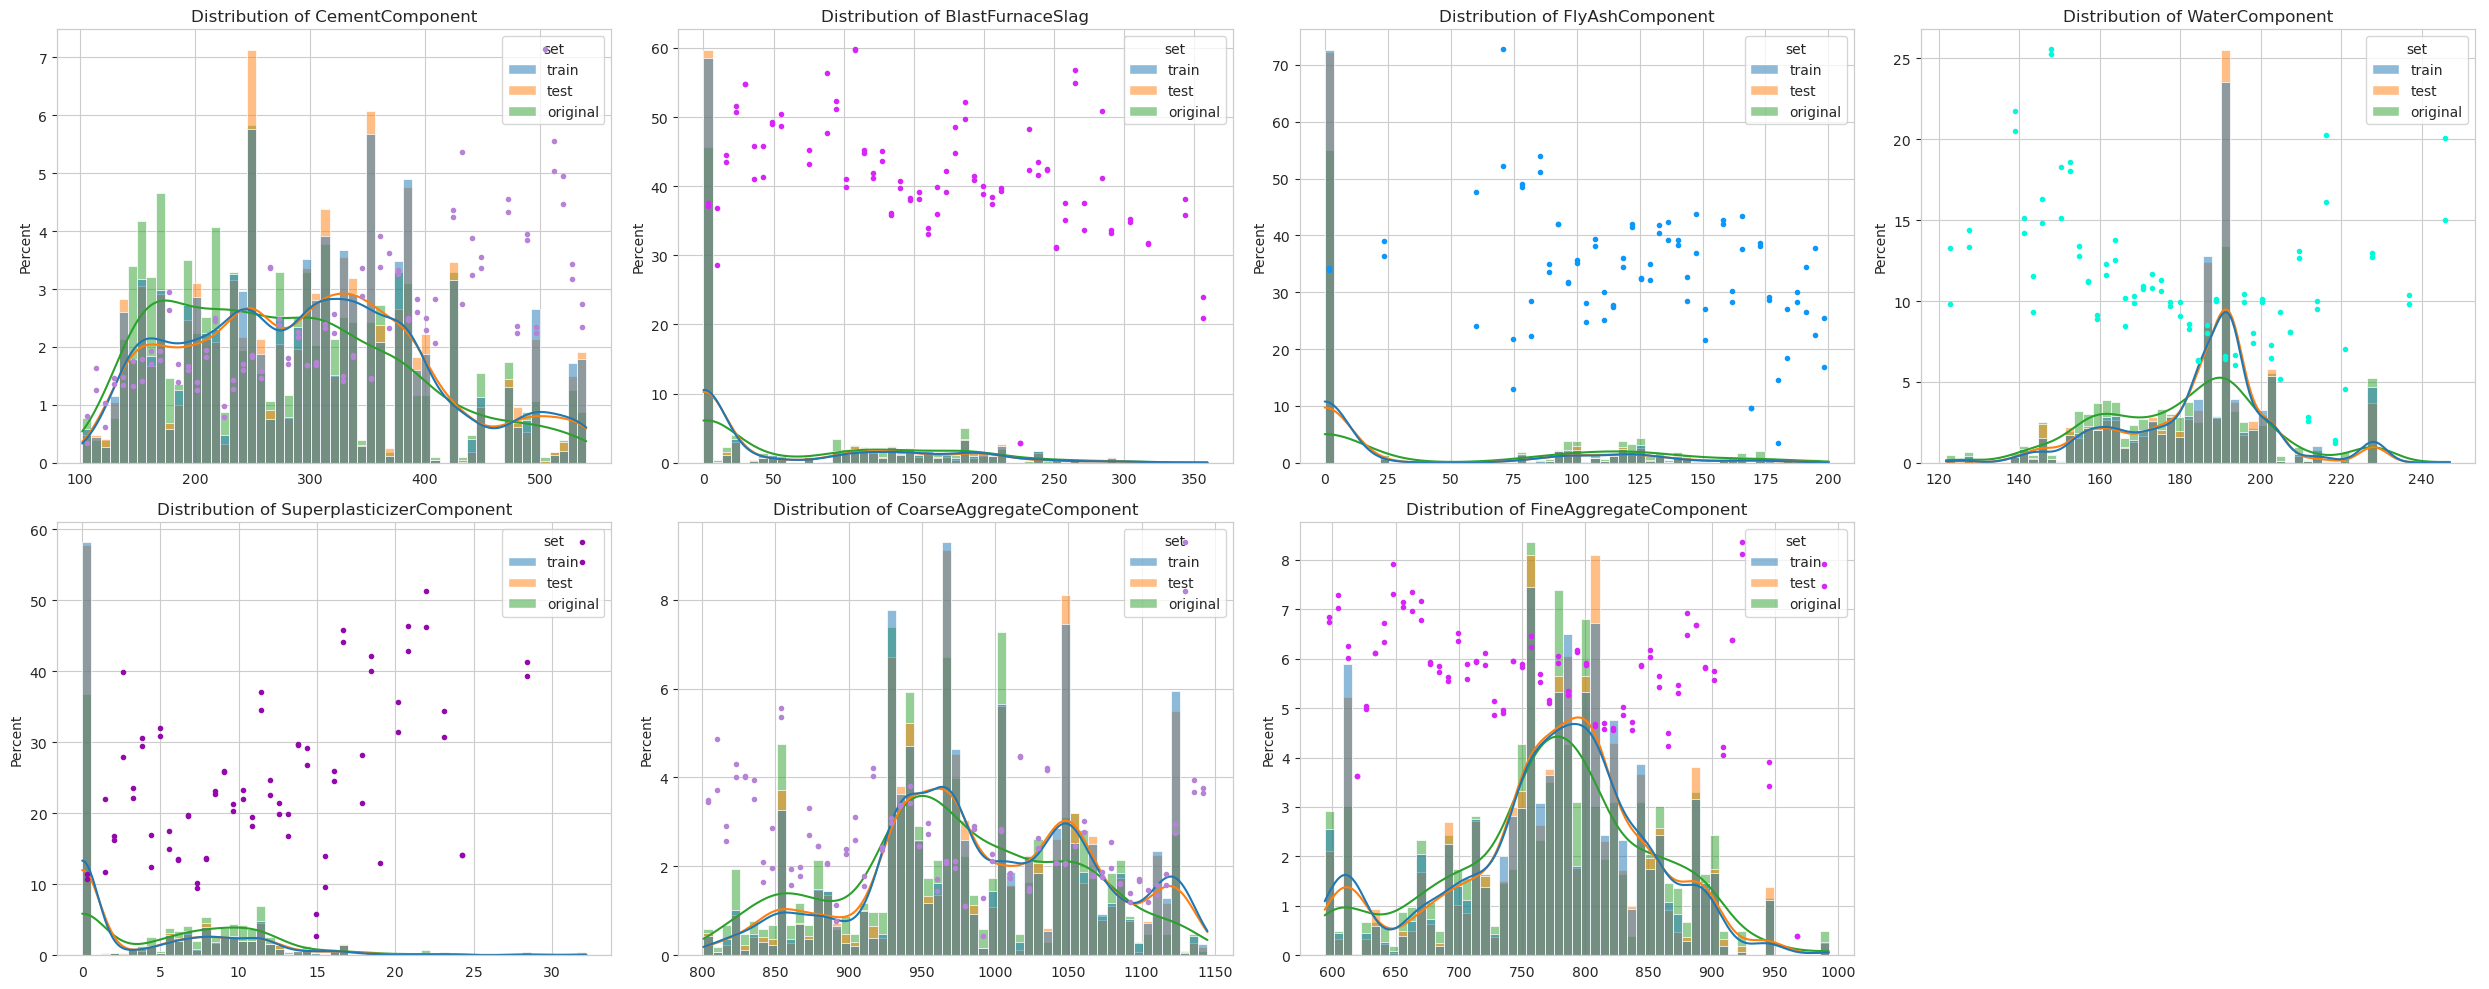

In [19]:
x = 0
n_bins = 55
histplot_hyperparams = {
    "kde":True,
    "alpha":0.5,
    "stat":"percent",
    "bins":n_bins
}
line_style='-'

columns =  ORDINAL_COLS + NUM_COLS
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(25, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    if x == 4:
        x = 0
    else:
        x = x + 1
    plot_axes = [ax[i]]
    
    if column in ORDINAL_COLS:
        plot_ordinals(column, ax[i], PALETTE_7[x])
    else:
        plot_cont(column, ax[i], PALETTE_7[x])

    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")

plt.tight_layout()

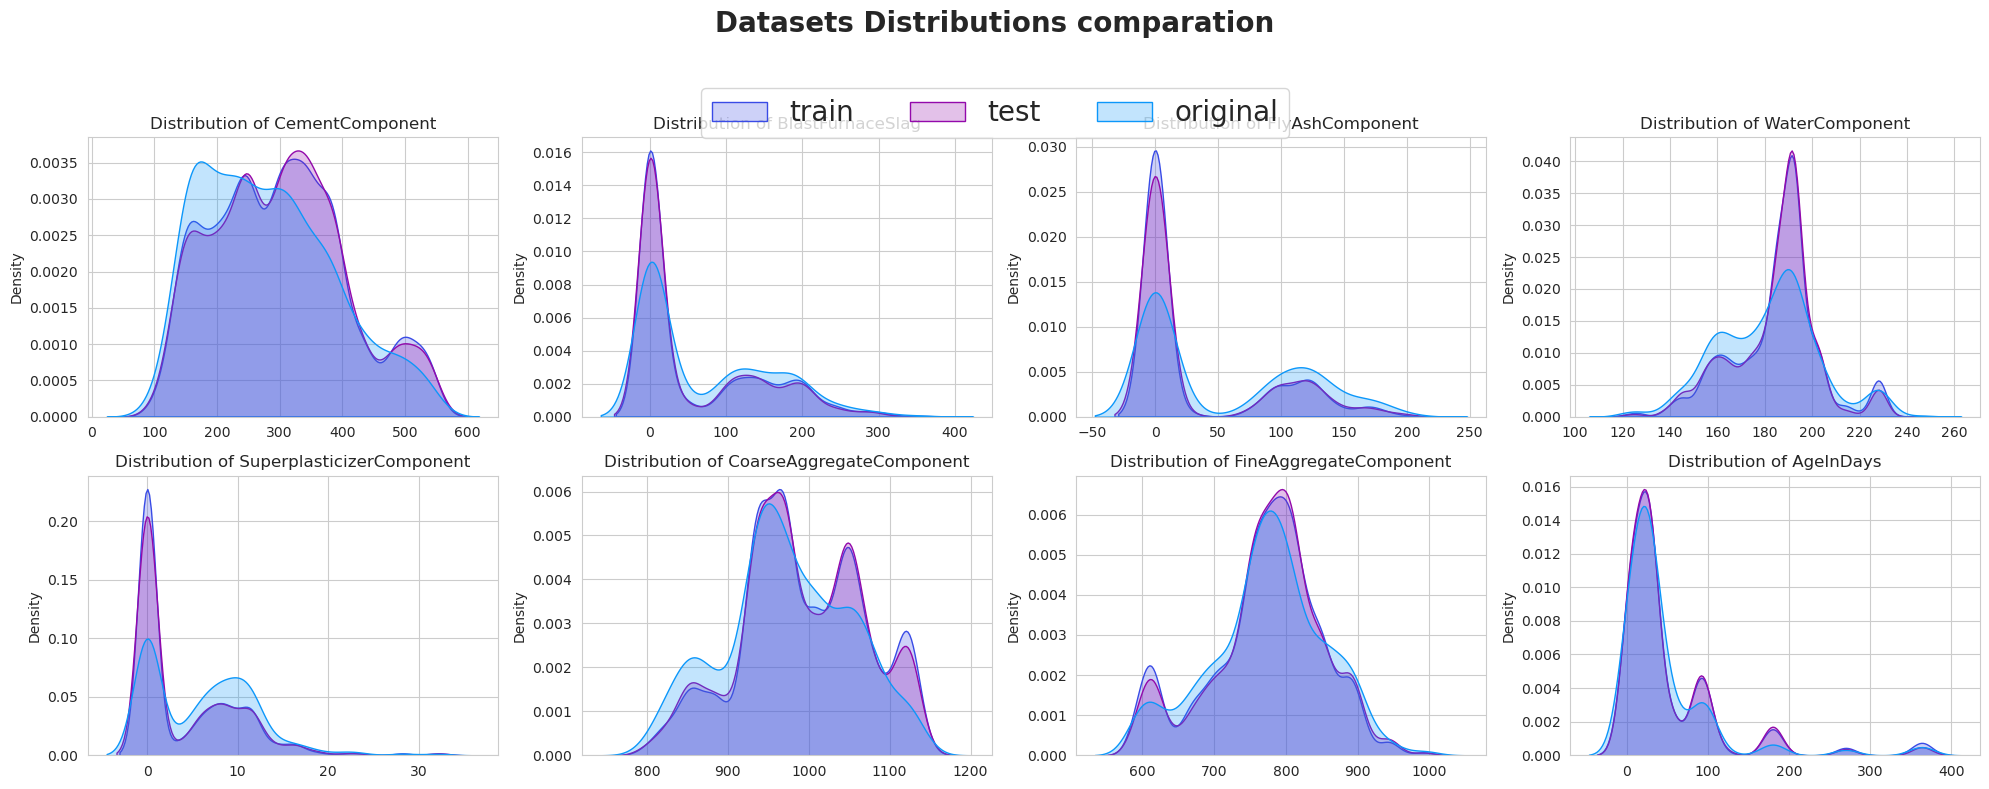

In [20]:
columns = test_df.columns
columns = columns.drop("id")
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
          
    sns.kdeplot(
        train_df[column], label="Train PS dataframe",
        ax=ax[i], color=PALETTE_7[5], fill=True
    )

    sns.kdeplot(
        test_df[column], label="Test PS datafraem",
        ax=ax[i], color=PALETTE_7[0], fill=True
    )
    
    sns.kdeplot(
        original_df[column], label="Original train dataframe",
        ax=ax[i], color=PALETTE_7[3], fill=True
    )
    
#     sns.kdeplot(
#         test_or_df[column], label="Original test dataframe",
#         ax=ax[i], color=SEC_PALETTE[1]
#     )
    

    
    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
    plot_axes = [ax[i]]
    handles = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")
    
fig.suptitle(f"Datasets Distributions comparation\n\n", fontsize=20, ha="center", fontweight="bold")
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.9), fontsize=20, ncol=4)
plt.tight_layout()

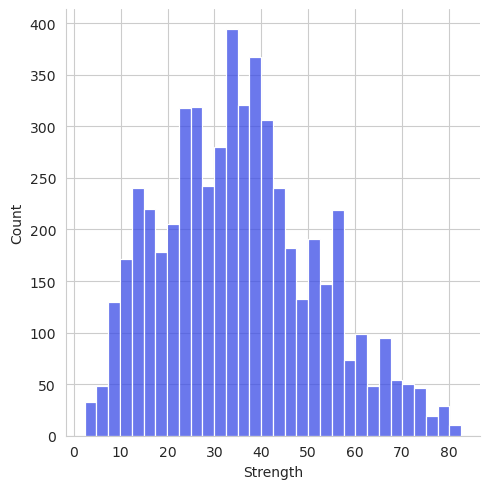

In [21]:
sns.displot(train_df[TARGET], height=5, color=PALETTE_7[5])
plt.show()

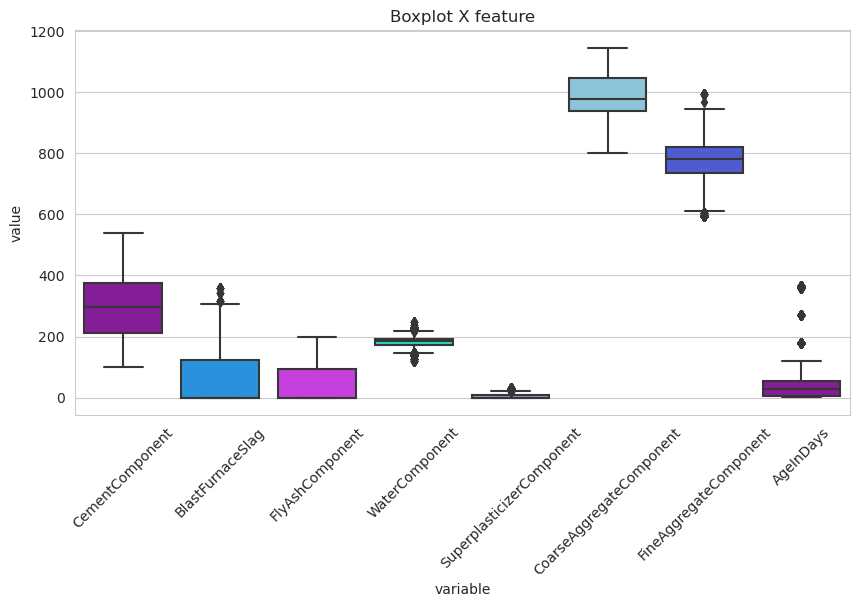

In [22]:
all_data = pd.DataFrame(data = comb_df, columns = columns)
plt.figure(figsize=(10,5)) 
sns.boxplot(data=pd.melt(all_data), x="variable", y="value", palette=PALETTE_7_C).set_title("Boxplot X feature",size=12)
plt.xticks(rotation=45)
plt.show()

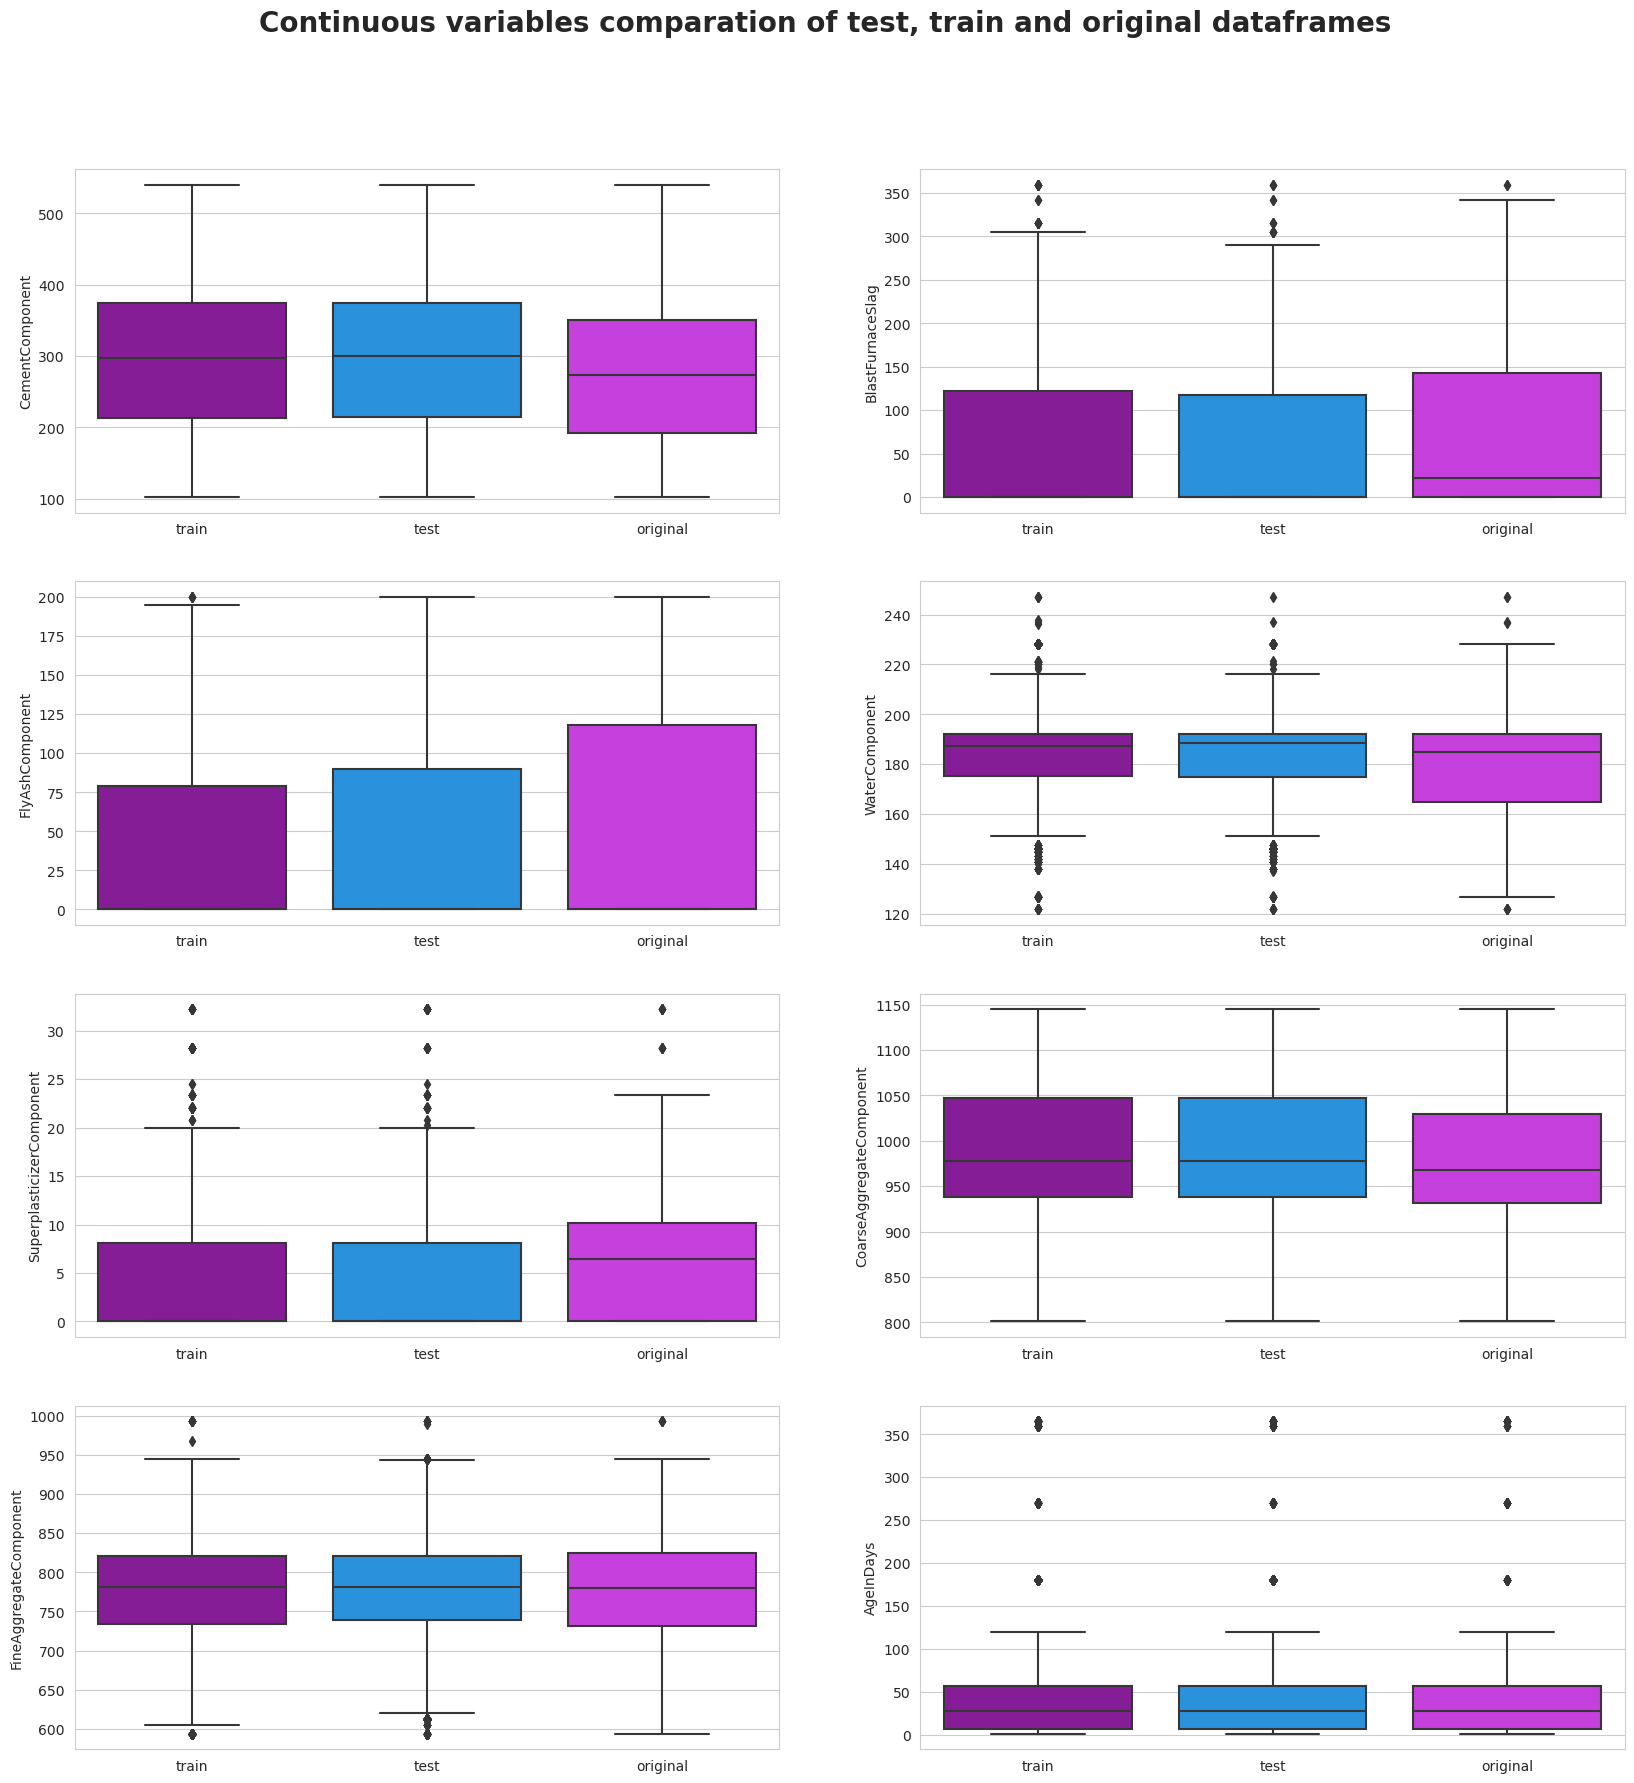

In [23]:
fig,axes = plt.subplots(4,2,figsize = (20,20))
fig.suptitle("Continuous variables comparation of test, train and original dataframes",size = 20,fontweight="bold")
fig.subplots_adjust(top=0.9)
for i, feature in enumerate(columns):
    plt.subplot(4,2,i+1)
    f1 = sns.boxplot(x = "set", y =feature, data = comb_df, palette = PALETTE_7_C)
    f1.set_xlabel(None)


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data preparation and prediction</p>

In [24]:
X = train_df.drop(columns=[ID, TARGET])
y = train_df[TARGET]

### <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#A766FA; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #5F06D1">Model</p>

In [25]:
optuna_switch = 'off'
usingGPU = 'n' 

# Param
objective = "regression"
metric = "rmse"
test_size = 0.2

In [26]:
# Optuna
def tuneParam(X, value, test_size, usingGPU):
    if usingGPU == 'y':
        opt_params = {
            'device': 'gpu',
            "objective" : objective,
            "metric" : metric
        }
    else:
        opt_params = {
            "objective" : objective,
            "metric" : metric
        }


    X_train,X_test,y_train,y_test = train_test_split(
        X,
        value,
        test_size = test_size
    )

    reg_train = lgb.Dataset(
        X_train,
        y_train
    )

    reg_eval = lgb.Dataset(
        X_test,
        y_test,
        reference = reg_train
    )

    opt = lgbo.train(
        opt_params,
        reg_train,
        valid_sets = reg_eval,
        verbose_eval = False,
        num_boost_round =200,
        early_stopping_rounds = 100
    )
    return opt

In [27]:
%%time

if optuna_switch == 'on':
    opt = tuneParam(X, y, test_size, usingGPU)
    print(opt.params)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


In [28]:
%%time

learning_rate = 0.0002 
num_iterations = 305000 
max_depth = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    random_state=500)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

if torch.cuda.is_available():
    if usingGPU == 'y':
        device = 'gpu'
    else:
        device = ''
else:
    device = ''

if optuna_switch == 'on':
    params = {
        'device': device,
        'task': 'train',
        'objective': objective,
        'metric': metric,
        'boosting_type': 'gbdt',
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'num_iterations': num_iterations,
        'lambda_l1': opt.params['lambda_l1'],
        'lambda_l2': opt.params['lambda_l2'],
        'num_leaves': opt.params['num_leaves'],
        'bagging_freq': opt.params['bagging_freq'],
        'feature_fraction': opt.params['feature_fraction'],
        'bagging_fraction': opt.params['bagging_fraction'],
        'min_child_samples': opt.params['min_child_samples'],
        'feature_pre_filter': opt.params['feature_pre_filter'],
        'verbosity': -1
    }
else:
    params = {
        'device': device,
        'lambda_l1': 4.32,
        'lambda_l2': 0.93,
        'num_leaves': 3,
        'feature_fraction': 1.0,
        'bagging_fraction': 0.49,
        'task': 'train',
        'objective': objective,
        'metric': metric,
        'feature_pre_filter': False,
        'bagging_freq': 6,
        'min_child_samples': 20,
        'boosting_type': 'gbdt',
        'learning_rate': learning_rate,
        'num_iterations': num_iterations,
        'max_depth': max_depth,
        'verbosity': -1
    }


evaluation_results = {}
model = lgb.train(
    params,
    valid_names=['train', 'valid'],           
    valid_sets=[lgb_train, lgb_eval],        
    evals_result=evaluation_results,          
    train_set=lgb_train,
    early_stopping_rounds=1000,
    verbose_eval=1000
)

Training until validation scores don't improve for 1000 rounds
[1000]	train's rmse: 15.2432	valid's rmse: 16.1043
[2000]	train's rmse: 14.5255	valid's rmse: 15.4392
[3000]	train's rmse: 14.0009	valid's rmse: 14.9525
[4000]	train's rmse: 13.6165	valid's rmse: 14.6009
[5000]	train's rmse: 13.3285	valid's rmse: 14.3352
[6000]	train's rmse: 13.1008	valid's rmse: 14.1333
[7000]	train's rmse: 12.9142	valid's rmse: 13.9639
[8000]	train's rmse: 12.7554	valid's rmse: 13.82
[9000]	train's rmse: 12.6217	valid's rmse: 13.6959
[10000]	train's rmse: 12.5115	valid's rmse: 13.5956
[11000]	train's rmse: 12.4187	valid's rmse: 13.5119
[12000]	train's rmse: 12.34	valid's rmse: 13.4404
[13000]	train's rmse: 12.2732	valid's rmse: 13.3775
[14000]	train's rmse: 12.215	valid's rmse: 13.3229
[15000]	train's rmse: 12.1651	valid's rmse: 13.2755
[16000]	train's rmse: 12.1206	valid's rmse: 13.2331
[17000]	train's rmse: 12.0818	valid's rmse: 13.195
[18000]	train's rmse: 12.0476	valid's rmse: 13.1624
[19000]	train's 

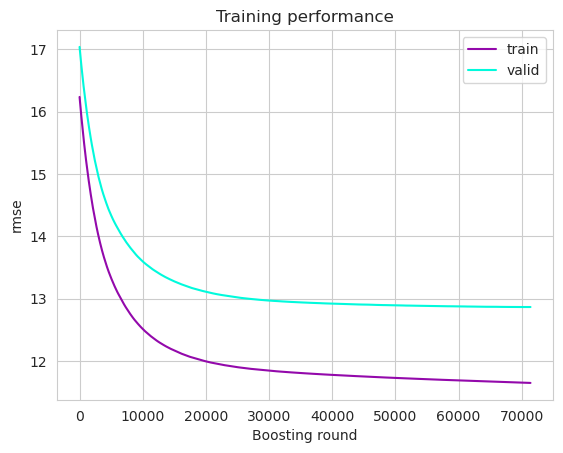

In [29]:
plt.plot(evaluation_results['train'][metric], label='train', color=PALETTE_7_C[0])
plt.plot(evaluation_results['valid'][metric], label='valid', color=PALETTE_7_C[3])
plt.ylabel(metric)
plt.xlabel('Boosting round')
plt.title('Training performance')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

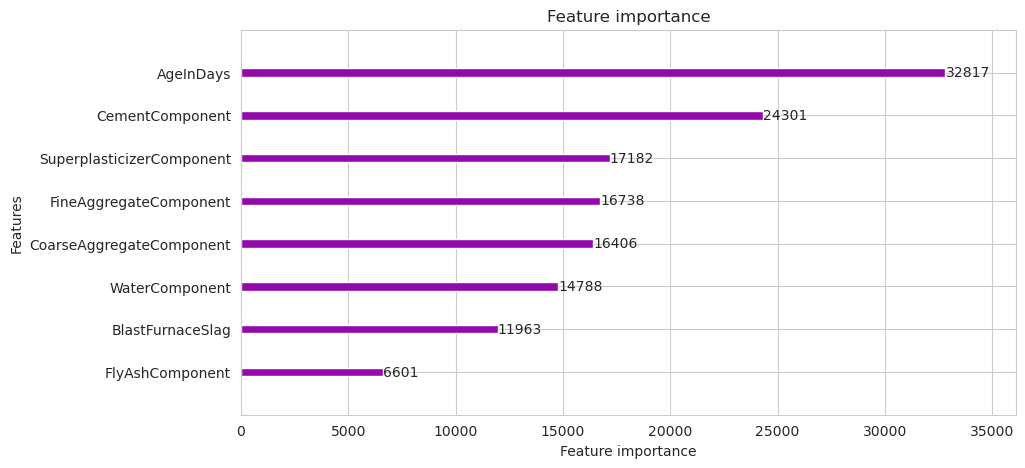

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
lgb.plot_importance(model, ax=ax, color=PALETTE_7[0])

### <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#A766FA; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #5F06D1">Gradient Boosting Regressor</p>

In [31]:
gbr_params = {'n_estimators': 500, # 500
              'max_depth': 3, # 3
              'min_samples_leaf': 3, # 3              
              'learning_rate': 0.01, 
              'min_samples_split': 3,
              'max_features': 'log2',
              'loss': 'squared_error',}

#     tol=0.01,
#     random_state=18,    
#     max_features="sqrt",
#     n_estimators=1000,
#     learning_rate=0.01,
#     n_iter_no_change=5,
#     min_samples_split=3,
#     validation_fraction=0.2,

In [32]:
gbr_model = ensemble.GradientBoostingRegressor(**gbr_params)

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_features='log2',
                          min_samples_leaf=3, min_samples_split=3,
                          n_estimators=500)

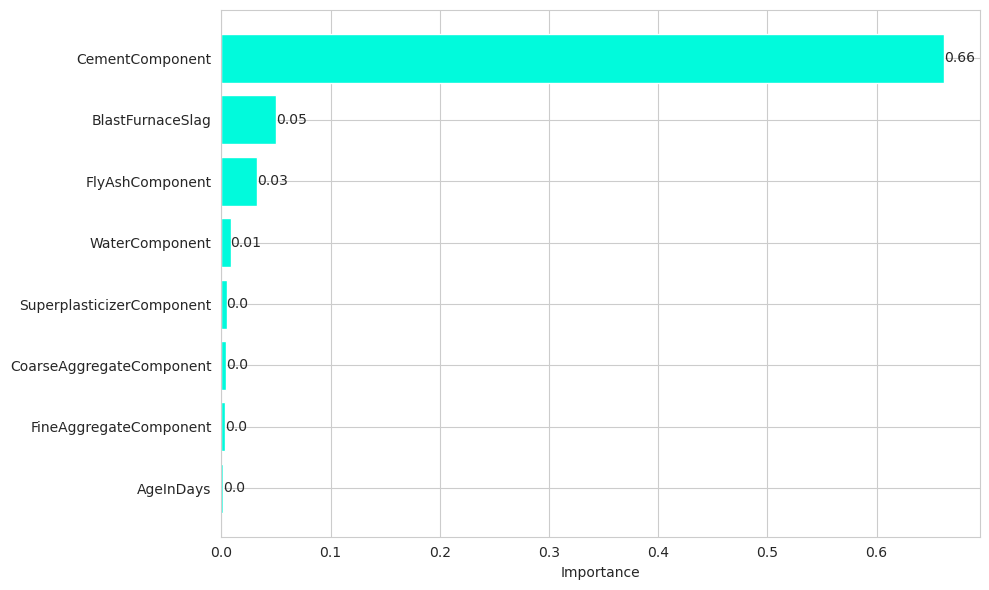

In [33]:
result = permutation_importance(gbr_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

feature_names = test_df.columns.tolist() # exclude the last column, which is the target variable
feature_names.remove(ID)
# sort features by importance
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(feature_names, importances[indices], align='center', color=PALETTE_7[4])
ax.set_xlabel('Importance')
ax.invert_yaxis()  # invert the y-axis to show the most important features at the top

# add text labels to the bars
for i, v in enumerate(importances[indices]):
    ax.text(v, i, str(round(v, 2)), ha='left', va='center')

plt.tight_layout()
plt.show()

In [34]:
prediction=gbr_model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
RMSE = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

12.90373101200121


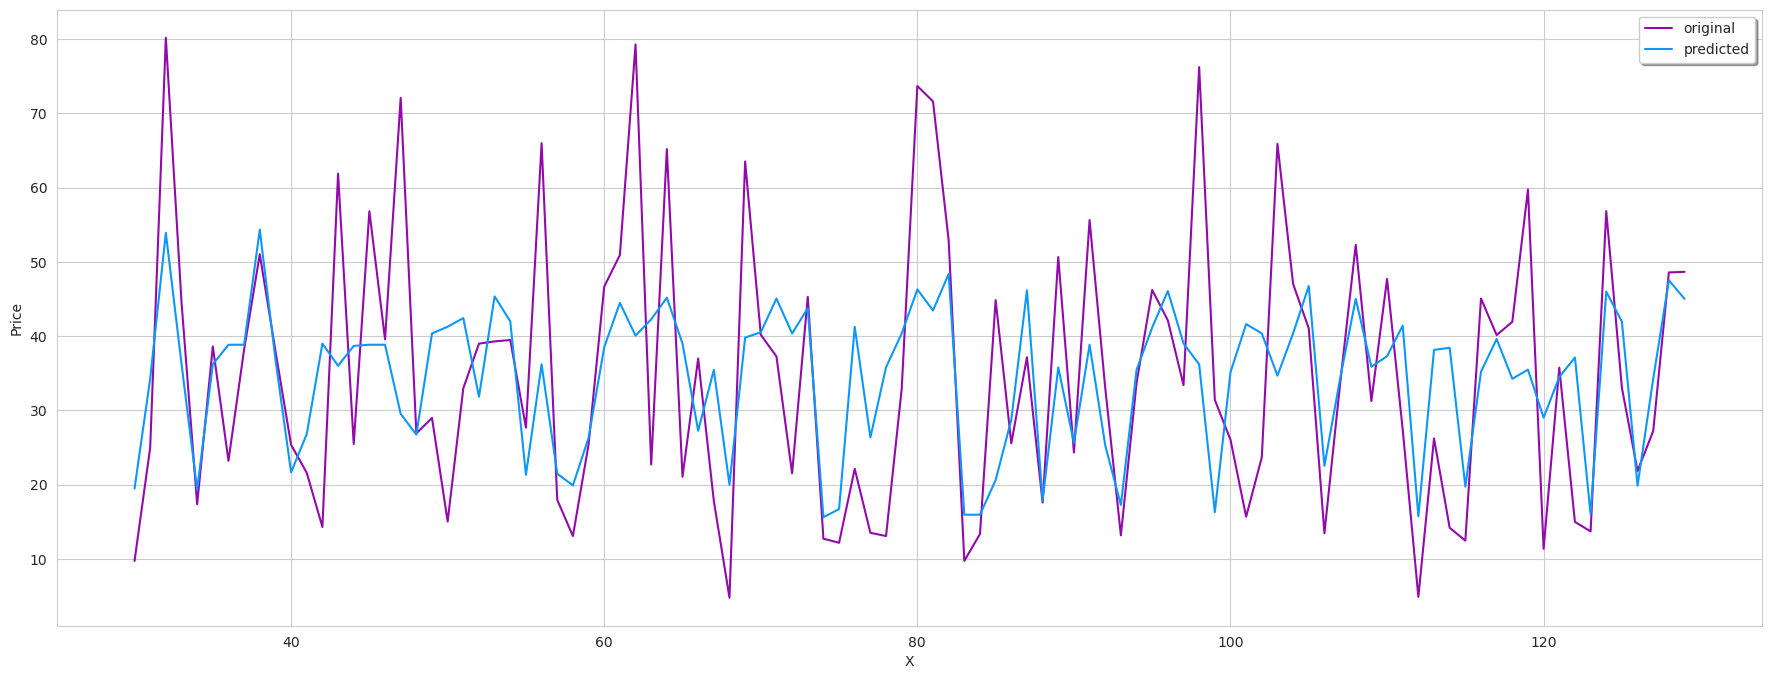

In [35]:
random_x=int(random.uniform(0,len(y_test)-101))
random_y=random_x+100

x_ax = range(len(y_test))
plt.figure(figsize=(22, 8))
plt.plot(x_ax[random_x:random_y] , y_test[random_x:random_y]  , label="original", color=PALETTE_7_C[0])
plt.plot(x_ax[random_x:random_y] , prediction[random_x:random_y] , label="predicted", color=PALETTE_7_C[1])
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Send prediction</p>

In [36]:
%%time

result = model.predict(test_df.drop(columns=['id']))
result

CPU times: user 22.1 s, sys: 0 ns, total: 22.1 s
Wall time: 11.1 s


array([48.29526038, 20.18703995, 34.33475474, ..., 38.46741374,
       33.85228273, 21.59484075])

In [37]:
gbr_res = gbr_model.predict(test_df.drop(ID, axis=1))
gbr_res

array([48.13915803, 20.29888193, 34.69875457, ..., 38.79778241,
       30.87043412, 22.07566952])

In [38]:
#submission_df[TARGET] = result
submission_df[TARGET] = gbr_res
submission_df

,id,Strength
0,5407,48.139158
1,5408,20.298882
2,5409,34.698755
3,5410,46.737886
4,5411,32.816081
...,...,...
3600,9007,34.275405
3601,9008,35.552332
3602,9009,38.797782
3603,9010,30.870434


In [39]:
submission_df.to_csv("submission.csv", index=False)

### The model and data analysis is in process, it will be updated in the next days, if you liked it or if it helped you feel free to leave your upvote.